# Coding Exercise Part 1: NN from Scratch in Numpy


### General Objective
* Code a "vanilla" feedforward neural network from the scratch using Numpy arrays.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Fix random seed: https://pytorch.org/docs/stable/notes/randomness.html
np.random.seed(12)

### 1. Implement Non-linear Activation Functions
In this exercise, you will implement some of the most commonly used non-linear activation functions in neural networks. These functions introduce non-linearity into the model, allowing it to learn from the error and make adjustments, which is essential for learning complex patterns.

**Objectives:**
* Implement the Rectified Linear Unit (ReLU) activation function.
* Implement the derivative of the ReLU function.
* Implement the Sigmoid activation function.

**Background:**

**ReLU (Rectified Linear Unit):** The function itself is max(0, x), meaning that if the input is positive, it returns the input, and if it's negative or zero, it returns zero. It's one of the most widely used activation functions in deep learning models. More details can be found [here](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).

**Sigmoid:** It's an S-shaped curve that can take any real-valued number and map it between 0 and 1. It's especially useful for models where we have to predict the probability as an output.

In [2]:
def relu(x):
    """
    Compute the ReLU of x.

    Args:
    - x: A numpy array of any shape.

    Returns:
    - A numpy array of the same shape as x, where each element is the ReLU of the corresponding element of x.
    """
    # Relu activation function
    return np.maximum(0,x)

In [3]:
def relu_derivative(x):
    """
    Compute the derivative of ReLU of x.

    Args:
    - x: A numpy array of any shape.

    Returns:
    - A numpy array of the same shape as x, where each element is the derivative of ReLU of the corresponding element of x.
    """
    # Relu derivative function
    x[x<=0] = 0
    x[x>0]  = 1
    return x

In [4]:
def sigmoid(x):
    """
    Compute the sigmoid of x.

    Args:
    - x: A numpy array of any shape.

    Returns:
    - A numpy array of the same shape as x, where each element is the sigmoid of the corresponding element of x.
    """
    # Sigmoid activation function
    return 1/(1+np.exp(-x))

**Note:**
* Ensure that the functions can handle numpy arrays of any shape.
* Avoid using loops; instead, utilize numpy's vectorized operations.

### 2. Implement Loss Function (Binary Cross Entropy Loss)

In this exercise, you will implement the Binary Cross Entropy (BCE) loss function, which is commonly used in binary classification tasks. The BCE loss measures the performance of a classification model whose output is a probability value between 0 and 1.

**Objectives:** 
* Implement the Binary Cross Entropy loss function.

**Background:**

**Binary Cross Entropy Loss:** It's a loss function used for binary classification problems. The BCE loss increases as the predicted probability diverges from the actual label. The mathematical formula for BCE is given by:

$L_{B C E}=-\frac{1}{n} \sum_{i=1}^n\left(Y_i \cdot \log \hat{Y}_i+\left(1-Y_i\right) \cdot \log \left(1-\hat{Y}_i\right)\right)$

Where:

* $n$ is the number of samples.
* $Y_i$ is the actual label (0 or 1).
* $\hat{Y}_i$ is the predicted probability.

In [5]:
def binary_cross_entropy_loss(y, y_hat):
    """
    Compute the Binary Cross Entropy loss.

    Args:
    - y: A numpy array of shape (n,) containing the true labels (0 or 1).
    - y_hat: A numpy array of shape (n,) containing the predicted probabilities.

    Returns:
    - A scalar representing the BCE loss.
    """
    
    epsilon = 1e-15
    y_hat   = np.clip(y_hat, epsilon, 1 - epsilon) # clipping (>0) to avoid NaNs in log
    
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

**Notes:**
* Ensure that the function can handle numpy arrays of any shape.
* To avoid `NaNs` in the logarithm operation when $\hat{Y}_i$ is exactly 0, clip the values of $\hat{Y}_i$ to a small value above 0 using [`np.clip`](https://numpy.org/doc/stable/reference/generated/numpy.clip.html).

### 3. Implement Accuracy Score

In this exercise, you will implement the accuracy score, which is a common metric used to evaluate the performance of classification models.

**Objectives:**
Implement the accuracy score function.

**Background:**

**Accuracy Score:** It's a metric that calculates the fraction of predictions our model got right. It is defined as the number of correct predictions divided by the total number of predictions. The mathematical formula for accuracy is given by:

$\text { Accuracy }=\frac{\text { Number of Correct Predictions }}{\text { Total Number of Predictions }}$

In [6]:
def accuracy(y, y_hat):
    """
    Compute the accuracy score.

    Args:
    - y: A numpy array of shape (n,) containing the true labels.
    - y_hat: A numpy array of shape (n,) containing the predicted labels.

    Returns:
    - A scalar representing the accuracy score.
    """
    # Computes the accuracy between the predicted labels and the truth labels
    acc = sum(y == y_hat) / len(y)  # fraction of predictions our model got right
    return acc[0]

**Notes:**
* Ensure that the function can handle numpy arrays of any shape.
* The function should return the fraction of correct predictions.
* Avoid using loops; instead, utilize numpy's vectorized operations.

### 4. Implement Neural Network class

In this exercise, you will implement a simple feed-forward neural network with one hidden layer. The neural network will be used for binary classification tasks.

**Objectives:**
* Implement the initialization method for the neural network.
* Implement the forward propagation step.

**Background:**
**Feed-forward Neural Network:** This is a type of artificial neural network where the connections between the nodes do not form a cycle. In this exercise, the neural network will have an input layer, one hidden layer, and an output layer.


In [7]:
# Neural Network class
class NeuralNetwork:

    # Init
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize the neural network with the given sizes.

        Args:
        - input_size: Integer, the number of input features.
        - hidden_size: Integer, the number of neurons in the hidden layer.
        - output_size: Integer, the number of neurons in the output layer (usually 1 for binary classification).

        Attributes to initialize:
        - W1, b1: Weights and bias for the input to hidden layer transformation.
        - W2, b2: Weights and bias for the hidden to output layer transformation.
        - input_size, hidden_size, output_size: Store the sizes.
        - loss_tracker: A list to keep track of the loss during training.
        """
        
        # Parameters dictionary holding weights and bias
        self.W1 = []
        self.b1 = []
        self.W2 = []
        self.b2 = []

        # Store NN shape (3 layers: input, hidden and output)
        self.input_size  = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights
        self.initialize_weights()

        # Loss x iteration tracking
        self.loss_tracker = []

    # Weights initialization using random normal distribution
    def initialize_weights(self):
        """
        Initialize the weights and biases for the neural network using a random normal distribution for weights 
        and zeros for biases.

        Attributes to initialize:
        - W1, b1: Weights and bias for the input to hidden layer transformation.
        - W2, b2: Weights and bias for the hidden to output layer transformation.
        """
        
        # Initialize first layer
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((self.hidden_size,1))

        # Initialize second layer
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    # Trains the neural network using the specified data (X) and labels (y)
    def train(self, X, y, learning_rate=0.001, epochs=1000):
         # Reset weights and bias
        self.initialize_weights()

        # Train a number of iterations
        for epoch in range(epochs):
            # Compute forward propagation
            Z1, A1, Z2, A2 = self.forward_propagation(X)

            # Compute loss value
            loss = binary_cross_entropy_loss(y, A2)
            self.loss_tracker.append(loss)

            # Perform backward propagation
            dW1, db1, dW2, db2 = self.backward_propagation(X, y, Z1, A1, A2)

            # Update the model parameters
            self.update_parameters(dW1, db1, dW2, db2, learning_rate)

            # Print status
            if epoch % 100 == 0:
                print(f"Epoch {epoch}/{epochs} - Loss: {loss}")

    # Perform forward propagation step
    def forward_propagation(self, X):
        """
        Perform the forward propagation step.

        Args:
        - X: A numpy array of shape (input_size, n) where n is the number of samples.

        Returns:
        - Z1, A1, Z2, A2: Intermediate values from the forward propagation.
        """
        Z1 = self.W1.T @ X + self.b1  # Linear activation
        A1 = relu(Z1)               # Non-linear activation
        Z2 = self.W2.T @ A1 + self.b2 # Linear activation
        A2 = sigmoid(Z2)            # Non-linear activation

        return Z1, A1, Z2, A2

    # Perform backward propagation step
    def backward_propagation(self, X, y, Z1, A1, A2):
        # Get the number of training examples
        m = X.shape[1]

        # Calculate the gradient of the loss with respect to Z2 (output of the second layer)
        dZ2 = A2 - y

        # Calculate the gradient of the loss with respect to W2 (weights of the second layer)
        # Values are scaled by m (dataset size). This is done to ensure that the update
        # to the weights and biases (during the gradient descent step) is based on the
        # average error across all examples, rather than the sum of the errors.
        dW2 = A1 @ dZ2.T / m

        # Calculate the gradient of the loss with respect to b2 (bias of the second layer)
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m # Scaled based on the size of the dataset

        # Calculate the gradient of the loss with respect to Z1 (output of the first layer before activation)
        # This involves the chain rule, taking into account the derivative of the activation function
        dZ1 = self.W2 @ dZ2 * relu_derivative(Z1)

        # Calculate the gradient of the loss with respect to W1 (weights of the first layer)
        dW1 = X @ dZ1.T / m # Scaled based on the size of the dataset

        # Calculate the gradient of the loss with respect to b1 (bias of the first layer)
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m # Scaled based on the size of the dataset

        # Return the gradients for the weights and biases of both layers
        return dW1, db1, dW2, db2

    # Update parameters (in the direction opposite to the derivative)
    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    # Predict
    def predict(self, X):
        # Predicts on test data
        _, _, _, A2 = self.forward_propagation(X)
        return (A2 > 0.5).astype(int)

    def plot_loss(self):
        # Plots the loss curve
        plt.plot(self.loss_tracker)
        plt.xlabel("Iteration")
        plt.ylabel("Loss (BCE)")
        plt.title("Loss curve")
        plt.show()

**Notes:** 
* Ensure that the methods can handle numpy arrays of any shape.
* The weights should be initialized using a random normal distribution and biases should be initialized to zeros.
* Avoid using loops; instead, utilize numpy's vectorized operations.
* The provided code contains other methods like train, backward_propagation, update_parameters, predict, and plot_loss. You don't need to modify these methods for this exercise.

### 5. Load dataset
We will work with the Haberman’s Survival Dataset. The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. There are 306 items (patients). There are three predictor variables (age, year of operation, number of detected nodes). The variable to predict is encoded as 0 (survived) or 1 (died). See [
Haberman's Survival Dataset](https://archive.ics.uci.edu/dataset/43/haberman+s+survival).

In [8]:
import pandas as pd

url = 'https://raw.githubusercontent.com/emmanueliarussi/DU-DeepLearning/main/week_2/haberman_data/haberman.data'
headers =  ['age', 'year','nodes','y']
haberman_df  = pd.read_csv(url, sep=',', names=headers)

In [9]:
haberman_df

,age,year,nodes,y
0,age,year,nodes,y
1,30,64,1,0
2,30,62,3,0
3,30,65,0,0
4,31,59,2,0
...,...,...,...,...
302,75,62,1,0
303,76,67,0,0
304,77,65,3,0
305,78,65,1,1


In [10]:
# Convert pandas dataframe into numpy arrays
x       = haberman_df.drop(columns=['y']).values[1:]
y_label = haberman_df['y'].values[1:].reshape(x.shape[0], 1).astype(float)

In [11]:
# Split data into train and test set
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y_label, test_size=0.2, random_state=2)

In [12]:
# Standardize the dataset
# Standardize features by removing the mean and scaling to unit variance.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing   import StandardScaler

sc = StandardScaler()
sc.fit(xtrain)
xtrain = sc.transform(xtrain)
xtest  = sc.transform(xtest)

print("Shape of train set is {}".format(xtrain.shape))
print("Shape of test set is {}".format(xtest.shape))
print("Shape of train label is {}".format(ytrain.shape))
print("Shape of test labels is {}".format(ytest.shape))

Shape of train set is (244, 3)
Shape of test set is (62, 3)
Shape of train label is (244, 1)
Shape of test labels is (62, 1)


In [13]:
# Create and train the Neural Network model
nn = NeuralNetwork(input_size=3, hidden_size=5, output_size=1)
nn.train(xtrain.T, ytrain.T, epochs=5000, learning_rate=0.01)

Epoch 0/5000 - Loss: 0.789918640660066
Epoch 100/5000 - Loss: 0.6449801903146681
Epoch 200/5000 - Loss: 0.6006388920067977
Epoch 300/5000 - Loss: 0.5808316581512042
Epoch 400/5000 - Loss: 0.5668901008248501
Epoch 500/5000 - Loss: 0.555918635532661
Epoch 600/5000 - Loss: 0.5477523029299053
Epoch 700/5000 - Loss: 0.5413024867107006
Epoch 800/5000 - Loss: 0.5358937874046175
Epoch 900/5000 - Loss: 0.531241707393715
Epoch 1000/5000 - Loss: 0.5272716492144564
Epoch 1100/5000 - Loss: 0.5240822097065853
Epoch 1200/5000 - Loss: 0.5213609448024722
Epoch 1300/5000 - Loss: 0.5189933890066117
Epoch 1400/5000 - Loss: 0.5168429251465918
Epoch 1500/5000 - Loss: 0.5149108310079495
Epoch 1600/5000 - Loss: 0.5131266930777045
Epoch 1700/5000 - Loss: 0.5112115276764942
Epoch 1800/5000 - Loss: 0.509378602976146
Epoch 1900/5000 - Loss: 0.5078392733672137
Epoch 2000/5000 - Loss: 0.5065234257379364
Epoch 2100/5000 - Loss: 0.505323116358584
Epoch 2200/5000 - Loss: 0.5043165890439102
Epoch 2300/5000 - Loss: 0.50

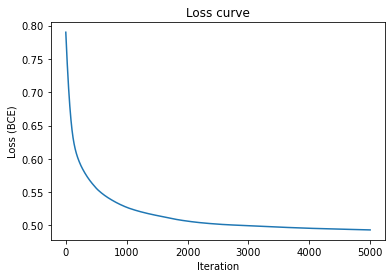

In [14]:
nn.plot_loss()

In [15]:
# Compare the training vs. testing data performance
train_pred = nn.predict(xtrain.T)
test_pred  = nn.predict(xtest.T)

print("Train accuracy is {0:.2f}".format(accuracy(ytrain, train_pred)))
print("Test accuracy is {0:.2f}".format(accuracy(ytest, test_pred)))

Train accuracy is 0.75
Test accuracy is 0.68
